In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mclib.vcf2 as mcvcf
%matplotlib inline

In [1]:
%qtconsole

In [3]:
mclab = os.getenv('MCLAB')
sandbox = '/home/jfear/sandbox/cegs_ase_paper/ase_lvl2_filtered_vcf_files'

## Read in QSIM Table

In [4]:
fname = os.path.join(mclab, 'cegs_ase_paper/pipeline_output/qsim_bayesian/qsim_bias_wide.csv')
dat = pd.read_csv(fname, index_col='fusion_id')

# Pull only line columns from dat and make qsim
qsim = dat.ix[:,1:-1]
qsim.convert_objects(convert_numeric=True)
qsim.head(2)

,r101,r109,r136,r149,r181,r208,r21,r217,r228,r280,...,w47,w52,w55,w59,w64,w67,w68,w74,w76,w79
fusion_id,,,,,,,,,,,,,,,,,,,,,
F10001_SI,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.500000,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
F10005_SI,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.516484,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


## Read in polymorphism counts
This table can be created by running /mclab/cegs_ase_paper/scripts/count_polymorphisms.py

In [12]:
rname = os.path.join(mclab, 'cegs_ase_paper/pipeline_output/polymorphisms_counts.csv')
results = pd.read_csv(rname, index_col='line')
results.head(2)

,masked,snps,indels,poly,total
line,,,,,
r101,83,157238,11123,168361,168444
r109,62,142774,9057,151831,151893


## Iterate over lines and fill in results table with counts

Here I count the number of locations that are permanently masked due to overlapping polymorphisms. I also count the number of SNPs and INDELs.

In [13]:
# Create a blank bias column for filling in
results['bias'] = pd.Series()

In [16]:
for line in results.index:
    cnts = qsim[line].value_counts()
    results.ix[line, 'bias'] = cnts[cnts.index != 0.5].sum()
results.head(3)

,masked,snps,indels,poly,total,bias
line,,,,,,
r101,83,157238,11123,168361,168444,868
r109,62,142774,9057,151831,151893,809
r136,66,147541,10250,157791,157857,789


In [61]:
summary = results.describe().ix[['min', 'mean', 'max']]
summary.convert_objects(convert_numeric=True)
summary.ix['median', 'masked'] = summary.masked.median()
summary.ix['median', 'snps'] = summary.snps.median()
summary.ix['median', 'indels'] = summary.indels.median()
summary.ix['median', 'poly'] = summary.poly.median()
summary.ix['median', 'total'] = summary.total.median()
summary.ix['median', 'bias'] = summary.bias.median()
summary.apply(np.round)

,masked,snps,indels,poly,total,bias
min,18,44468,941,45409,45428,573
mean,76,160218,11295,171514,171590,891
max,119,198418,17545,214889,214996,1163
median,76,160218,11295,171514,171590,891


## Plot Number Polymorphisms vs Bias

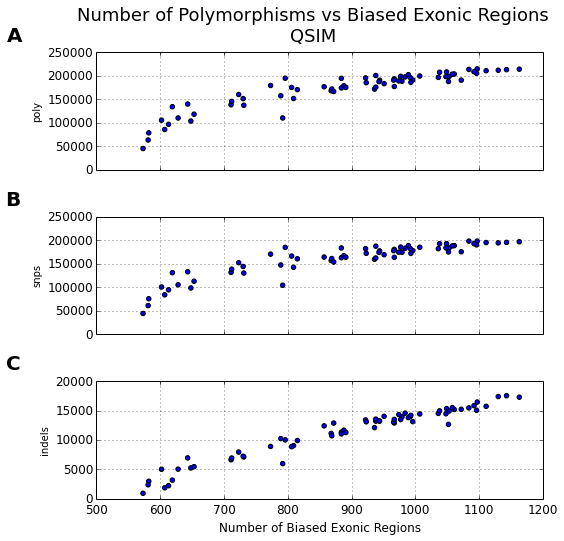

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8,8), dpi=100, sharex=True)
fig.subplots_adjust(hspace=0.4)
results.plot('bias', 'poly', kind='scatter', ax=ax1, fontsize=12)
results.plot('bias', 'snps', kind='scatter', ax=ax2, fontsize=12)
results.plot('bias', 'indels', kind='scatter', ax=ax3, fontsize=12)
ax3.set_xlabel('Number of Biased Exonic Regions', fontsize=12)
fig.suptitle(u'Number of Polymorphisms vs Biased Exonic Regions\nQSIM', fontsize=18, fontweight='medium')
ax1.text(-0.2, 1.1, 'A', transform=ax1.transAxes, fontsize=20, fontweight='bold')
ax2.text(-0.2, 1.1, 'B', transform=ax2.transAxes, fontsize=20, fontweight='bold')
ax3.text(-0.2, 1.1, 'C', transform=ax3.transAxes, fontsize=20, fontweight='bold')

plt.savefig(os.path.join(mclab, 'cegs_ase_paper/pipeline_output/qsim_bayesian/num_poly_vs_bias.png'), bbox_inches='tight')